# Term Project  Mid-term Report

# 빅데이터를 통한 국민 건강 수준 평가

- 2016104902 스포츠의학과 심우섭

# 개요

1) 최근 의료 분야에 대한 사회적 관심이 급증하면서 이에 대한 수요 또한 늘어나고 있는 추세이나, 기술에 보수적인 성향을 갖는 의학 분야의 특성상 4차 산업혁명의 성과와 연관된 뚜렷한 결과물은 잘 보이지 않고 있다.

2) 건강과 의료분야는 데이터 사이언스가 효과적으로 응용 될 수 있는 여지가 많다.

       2-1) 의료분야는 꾸준한 데이터 축적을 통해 이미 충분한 양의 표본이 확보 되어있다.
       2-2) 통계적으로 유의미한 결과를 도출해 낼 수 있는 가능성이 크다.

3) 분석에 이용되는 데이터 정보는 2016년도 국민건강검진 결과, 2016년도 요인별 사망률, 주요 사망원인별 사망률 추이이다.

4) 데이터의 정렬은 성별을 기준으로 한다.

# 목적

본 프로젝트의 목적은 다음과 같다.

**A. 건강데이터의 분석 및 실효성 있는 지표로의 변환**

 - 건강검진결과를 분석, 정렬하여 수치화된 건강지표(Health Rate)의 분포도를 조사한다.

 - 사망률 통계를 통해 우리나라의 대표적 질병을 밝히고 그 위험도(사망률과의 연관성)를 조사한다.
 
**B. 변환된 지표를 이용한 실용적 사용**

  - 사용자의 데이터를 입력받고 해당 연령에서 평균 수치와 자신의 수치를 비교하여 출력한다.
  
  - 사용자의 입력 데이터를 다시 데이터에 추가하여 표본을 획득하고 정확성을 향상한다.

# 데이터 출처

1) 본 강의 웹/ 파이썬 홈페이지의 OpenAPI를 참고하여, 통계청 정부 3.0 공공데이터(https://www.data.go.kr/) 및 KOSIS 국가통계포털(http://kosis.kr/index/index.do) 의 자료를 사용했다.

2) 개인정보보호에 특히 더 민감한 의료자료이기 때문에 특정 웹에서 임의의 데이터 추출은 배제하였다.

3) 사용된 통계 파일은 모두 공개 API 데이터이며 csv 파일 형태로 저장 후 Python에서 가공하여 사용한다.

# 분석방법

**1) csv 파일을 Python으로 불러온 뒤 위의 목적에 부합하는 자료들을 추려 다시 재정렬한다. 분석의 몇 가지 원칙은 다음과 같다.**
- 건강지표(Health Rate)는 신장을 고려한 체중, 혈압, 콜레스테롤, 흡연 여부 등의 지표를 각각의 가중치를 설정하여 계산한다.
- 서로 연관성이 있다고 판단되는 지표의 상관성을 밝힌다.
**2) 사용자가 입력하고 싶지 않거나 가지고 있지 않은 지표는 평균치로 대체한다.**

**3) 이에 대한 테이블과 그래프를 numpy, matplotlib.pyplot 등의 모듈을 이용하여 시각적으로 표현한다.**

# 기대효과

1) 데이터를 기반으로 한 건강지표를 통해 국민 전체의 건강 수준과 이용자의 건강수준을 대략적으로 인식할 수 있다.

2) 요인별 사망률에 대한 통계와 함께 특히 주의해야할 질병 및 사망 요인은 무엇이 있는지 통계적으로 알아볼 수 있다.

3) 이 알고리즘은 추후 다른 지표의 분석에도 같은 방식으로 응용될 여지가 있다.

# 한계점

1) 이용되는 데이터의 양이 한정적이고 데이터마다 표본이 일정하지 않기 때문에 일관된 결과를 얻기 힘들다.

2) 이용되는 의료정보가 모두 국가에서 공개한 데이터이고, 개인정보보호법상 병원과 같은 실질적 의료기관의 데이터를 참고할 수 없다.

3) 파일을 가공하고 분석함에 있어서 본 프로젝트 제안자의 주관적 판단이 들어가기 때문에 100% 신뢰할 수 있는 결과를 도출한다고 말할 수 없다.


# 건강검진 결과 분석 
- 데이터 분석에 사용된 자료의 모집단은 40세 이상의 성인남녀 100만명이다.
- 코드의 용도에 대한 설명은 주석문으로 대체한다.
- 각 지표별 설명과 평균값 출력 및 분석 후 최종적으로 Health Rate를 출력하고 그 의미를 분석한다.
- 최종 결과값인 Health Rate는 정상 범주를 1로 두고 고위험군 범주를 2로 두어 그 사이의 값을 부여한다.
- 사용자가 입력한 지표에 대해서는 기준치, 전체 및 성별 평균과의 차이를 출력한다.
- 다음 Cell에서 Data 호출, 사용자 데이터 입력, 평균값 계산을 수행한다.

*데이터의 계산은 calculation 모듈에서, 출력과 관련된 부분은 ui 모듈에서 수행한다.*

In [1]:
import csv
import calculation as cl # User Defined module for calculation
import ui # User Defined module for printing UI



# load the file and create the unsorted, whole list
print("Loading Data...Please Wait.\n")

f = open('Health_examination.csv', 'r')
rdr = csv.reader(f)
exam_list = []
index = 0
for line in rdr:
    exam_list.append(line)
    index += 1
f.close()


select = input("Do you want input your data ?(y/n) :")

average_arr = [0]*28
male_average_arr = [0]*28
female_average_arr = [0]*28
user_data = [0]*28


ui.ui(user_data, average_arr, exam_list, select) # Print UI


# classification by sex
male =[]
female = []

for i in range(len(exam_list)-1):
    i = i + 1
    if (float(exam_list[i][2])) == 1:
        male.append(exam_list[i])
    elif (float(exam_list[i][2])) == 2 :
        female.append(exam_list[i])
        
for j in [7,12,13,14,15,16,17,18]:
    male_average_arr[j] = cl.calc_average(j, male)
    female_average_arr[j] = cl.calc_average(j, female)

print("\nDone! Now go to the next step!")

Loading Data...Please Wait.

Do you want input your data ?(y/n) :n

Calculating..Please Wait..

Done! Now go to the next step!


# 지표별 평균값 분석
- 계산에 사용된 calculation 모듈 계산 방식(정량적 분류)은 각 지표별로 설명한다.
- 평균값 Graph의 첫번째 항목은 각 지표별 정상범주를 출력한다.


**※ 40대 이상의 평균값이기 때문에 20~30대의 수치와 실질적인 비교는 어려우나 다른 연령대에서도 수치상의 기준은 변하지 않는다.**

# BMI 지수

- BMI 지수의 계산은 체중(kg) / 신장의 제곱(m^2)으로 구한다.
- 여러 논란은 있으나 비만도를 나타내는 지표로 널리 사용된다.
- 허리둘레, 지방 등을 한번에 지표 계산에 이용하여 결과값을 도출할 수 있으나, 우선 개별적으로 분석한 후 결과를 종합하여 판단하도록 한다.
- 지표의 정량적 분류는 다음 Table과 같다. (본 프로젝트에서는 일반적인 분류 기준에서 조금 더 세분화된 기준을 적용하였다.)

BMI지수 범위 |<center> 분류</center> | Health Rate
-------------| ---- | -----------
bmi < 18.5   |저체중| 1.7
18.5 <= bmi < 23   |정상체중| 1.0
23 <= bmi < 25   |과체중| 1.1
25 < = bmi < 27   |위험체중| 1.3
27 <= bmi < 30   |1단계 비만| 1.5
bmi >= 30   |2단계 비만| 2.0

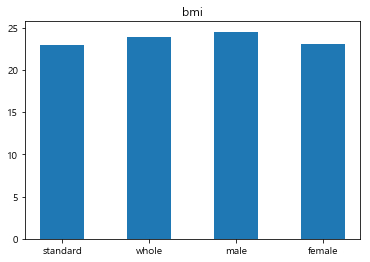

In [2]:
bmi = []

user_bmi = (user_data[6])/(((user_data[5])/100)**2)


bmi.append(cl.weight_rate(exam_list)[1])
bmi.append(cl.weight_rate(male)[1])
bmi.append(cl.weight_rate(female)[1])
bmi.append(user_bmi)


ui.graph('bmi', 23 , bmi, user_bmi, user_data[2])

# BMI 지수 분석 결과

1) 성별에 관계없이 전체적인 평균값이 정상체중 기준값보다 더 높게 나타난다.<br>
    **- 비만인구 증가에 따른 경각심이 필요하다.**<br>
2) 남성이 여성보다 평균적으로 비만율이 더 높다.

# 혈압
- 혈압은 심장 건강을 나타내며, 신체의 건강을 측정하는 주요 지표 중 하나이다.
- 혈압이 높아지면 여러가지 합병증을 야기하고 건강에 직접적인 영향을 주므로 관심을 가지고 관리해야할 부분이다. 
- 수축기 혈압과 이완기 혈압을 함께 고려하여 정상, 고혈압을 분류하였다.
- 지표의 정량적 분류는 다음 Table과 같다.

수축기 혈압 범위 | 구분 |이완기 혈압 범위 |<center> 분류</center> | Health Rate
-----------------|--|-----------------| --------------------- | -----------
<center> 혈압 < 120 </center>| and |<center>혈압 < 80</center> | <center>정상</center> | 1.0
<center> 120 <= 혈압 < 129 </center>| or |<center>80 <= 혈압 < 84 </center> | 고혈압 전단계 1기 | 1.2
<center> 129 <= 혈압 < 140 </center>| or |<center>84 <= 혈압 < 84 </center> | 고혈압 전단계 2기 | 1.4
<center> 140 <= 혈압 < 160 </center>| or |<center>90 <= 혈압 < 100 </center> | <center>고혈압 1기</center> | 1.6
<center> 160 <= 혈압 < 200 </center>| or |<center>100 <= 혈압 < 140 </center> | <center>고혈압 2기</center> | 1.9
<center> 200 <= 혈압  </center>| or |<center>140 <= 혈압  </center> |<center> 초고위험군</center> | 2.0

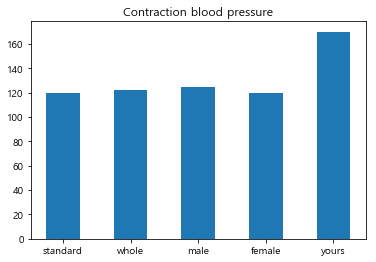

The diffrence between you and standard 50.00
The diffrence between you and whole avearage 47.77


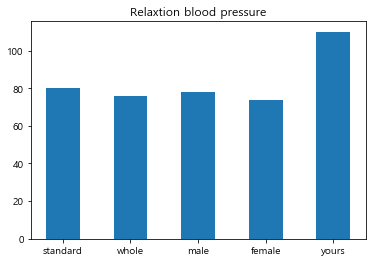

The diffrence between you and standard 30.00
The diffrence between you and whole avearage 34.04


In [16]:
bl_pressure = []
bl_pressure2 = []

bl_pressure.append(average_arr[12])
bl_pressure.append(male_average_arr[12])
bl_pressure.append(female_average_arr[12])
bl_pressure.append(user_data[12])

bl_pressure2.append(average_arr[13])
bl_pressure2.append(male_average_arr[13])
bl_pressure2.append(female_average_arr[13])
bl_pressure2.append(user_data[13])

ui.graph('Contraction blood pressure' ,120 , bl_pressure, user_data[12], user_data[2])
ui.graph('Relaxtion blood pressure', 80 , bl_pressure2, user_data[13], user_data[2])

# 혈압 분석 결과

1) 전체평균과 기준치를 비교하면 성별과 무관하게 전체적으로 정상범주에서 크게 벗어나지 않는 추세를 보인다.<br>
2) BMI와 마찬가지로 남성이 여성보다 평균값이 더 높다.<br>
3) 평균치를 고려했을 때 고혈압은 아직까지 사회적으로 큰 위협이 될 만큼 흔한 질병은 아니나 남성의 경우는 기준치보다 다소 높은 평균값을 보이므로 주의가 필요하다.

# 혈당
- 혈중 포도당의 농도로, 공복시의 수치를 측정하는 것이 일반적이며, 본 프로젝트에 사용된 자료도 공복수치를 이용하였다.
- 혈당이 높아지면 당뇨병을 야기하고 필요 이상으로 낮아지면 저혈당 증상을 보인다.
- 당뇨병과 저혈당 모두 심각한 합병증을 동반하고 심한 경우 사망까지 이르게 되기 때문에, 혈당 수치는 주요 건강지표로 사용되고 있다.
- 저혈당의 경우 지표의 평균치로 식별하기에는 제한되기 때문에 계산 모듈에서 표본수 대비 저혈당 인구의 비율을 따로 계산한다.
- 지표의 정량적 분류는 다음 Table과 같다.

혈당 범위 |<center> 분류</center> | Health Rate
-------------| ---- | -----------
70 <= 혈당 < 100   |정상| 1
혈당 < 70   |저혈당| 1.5
100 <= 혈당 < 125   |당뇨전단계| 1.4
125 < = 혈당 < 150   |당뇨병판정| 1.7
150 <= 혈당 < 200   |고위험군| 1.8
혈당 >= 200   |초고위험군| 2.0

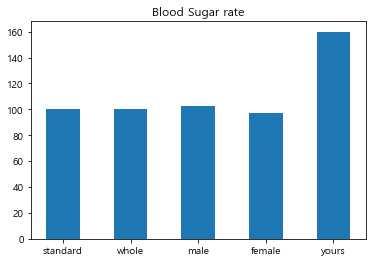

The diffrence between you and standard 60.00
The diffrence between you and whole avearage 59.97

Whole Low Blood Sugar rate proportion :  0.5622 %
Male Low Blood Sugar rate proportion :  0.5014 %
Female Low Blood Sugar rate proportion :  0.6317 %


In [17]:
bl_sugar = []
# Input User data


bl_sugar.append(average_arr[14])
bl_sugar.append(male_average_arr[14])
bl_sugar.append(female_average_arr[14])
bl_sugar.append(user_data[14])

ui.graph('Blood Sugar rate' , 100 , bl_sugar, user_data[14], user_data[2])

# Print Low Blood sugar rate ratio
print("\nWhole Low Blood Sugar rate proportion : " , "%0.4f" % cl.bl_sugar_rate(exam_list)[1], "%")
print("Male Low Blood Sugar rate proportion : " , "%0.4f" % cl.bl_sugar_rate(male)[1], "%")
print("Female Low Blood Sugar rate proportion : " ,"%0.4f" % cl.bl_sugar_rate(female)[1], "%")

# 혈당 분석 결과
1) 혈당의 경우도 전체적인 평균은 기준치보다 크게 높지 않게 나타났다.<br>
2) 앞선 경우와 마찬가지로 남성의 평균이 여성보다 더 높다.<br>
**- 남성의 경우 평균치가 당뇨전단계 초기 수치를 보인다.<br> - 수치상으로는 기준값과 크게 차이나지 않아 보이지만 평균적으로 이 단계에 진입해 있다는 것에 경각심을 가질 필요가 있다.**<br>
4) 전체표본 대비 저혈당의 비율은 유의미하게 적은 수치를 보인다. 즉, 일반적으로는 저혈당보다 당뇨병 예방 및 치료에 초점을 맞춘 혈당 관리가 필요하다.<br>

## 콜레스테롤

- 총 콜레스테롤, 트리글리세라이드, HDL 콜레스테롤, LDL 콜레스테롤, 4가지 지표로 구성된다.
- 몸에 반드시 필요한 에너지원들 이지만 수치가 정상 범위에서 벗어나면 당뇨병, 동맥경화, 심혈관 질환 등의 원인이 될 수 있다.
- 각 지표별 정량적 분류는 다음 4가지 Table과 같다.

총 콜레스테롤 수치|<center> 분류</center> | Health Rate
-------------| ---- | -----------
콜레스테롤 < 200   |정상| 1
200 <= 콜레스테롤 < 240   |경계| 1.5
240 < = 콜레스테롤 < 300   |높음| 1.8
200 <= 콜레스테롤    |고위험군| 2.0

중성지방 수치|<center> 분류</center> | Health Rate
-------------| ---- | -----------
중성지방 < 150   |정상| 1
150 <= 중성지방 < 200   |경계| 1.5
200 < = 중성지방 < 500   |높음| 1.8
500 <= 중성지방    |고위험군| 2.0

HDL콜레스테롤 수치|<center> 분류</center> | Health Rate
-------------| ---- | -----------
HDL콜레스테롤 >= 60   |정상| 1
40 <= HDL콜레스테롤 < 60   |주의| 1.3
HDL콜레스테롤 < 40   |고위험군| 2.0

LDL콜레스테롤 수치|<center> 분류</center> | Health Rate
-------------| ---- | -----------
LDL콜레스테롤 < 100   |정상| 1
100 <= LDL콜레스테롤 < 130   |높은정상| 1.3
130 <= LDL콜레스테롤 < 160   |경계| 1.6
160 < = LDL콜레스테롤 < 190   |높음| 1.8
190 <= LDL콜레스테롤    |고위험군| 2.0

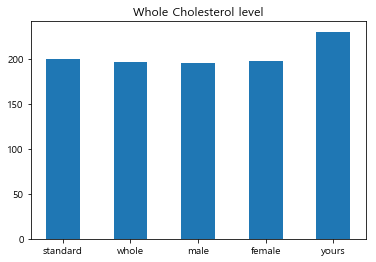

The diffrence between you and standard 30.00
The diffrence between you and whole avearage 33.92


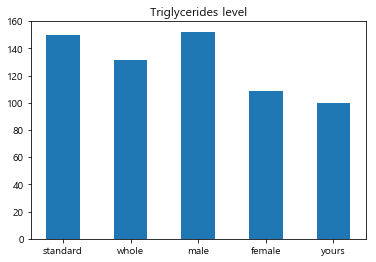

The diffrence between you and standard -50.00
The diffrence between you and whole avearage -31.73


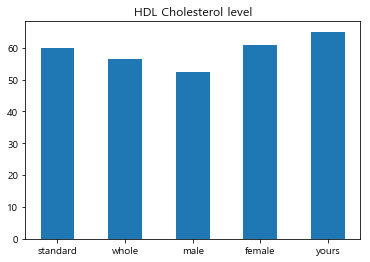

The diffrence between you and standard 5.00
The diffrence between you and whole avearage 8.60


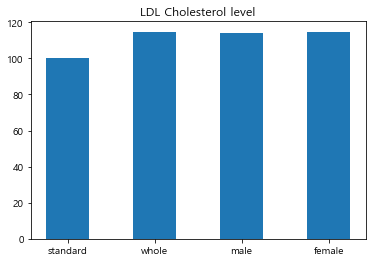

In [18]:
chl = []
trigly = []
hdl = []
ldl = []


chl.append(average_arr[15])
chl.append(male_average_arr[15])
chl.append(female_average_arr[15])
chl.append(user_data[15])

trigly.append(average_arr[16])
trigly.append(male_average_arr[16])
trigly.append(female_average_arr[16])
trigly.append(user_data[16])

hdl.append(average_arr[17])
hdl.append(male_average_arr[17])
hdl.append(female_average_arr[17])
hdl.append(user_data[17])

ldl.append(average_arr[18])
ldl.append(male_average_arr[18])
ldl.append(female_average_arr[18])
ldl.append(user_data[18])


ui.graph('Whole Cholesterol level' , 200 , chl, user_data[15], user_data[2])
ui.graph('Triglycerides level' , 150  , trigly, user_data[16], user_data[2])
ui.graph('HDL Cholesterol level' , 60 , hdl, user_data[17], user_data[2])
ui.graph('LDL Cholesterol level' , 100 , ldl, user_data[18], user_data[2])

# 콜레스테롤 분석 결과

- 다른 지표들과 비교했을 때 몇 가지 지표에서 남녀간의 차이가 뚜렷하게 나타나는 경향을 보인다. ,<br>
- HDL수치는 일반적인 수치로는 위에 제시한 범위로 분류하지만 질병의 관점에서는 남성과 여성의 수치를 다르게 판별한다.<br>
    **※ HDL 콜레스테롤 수치가 남자에서 40-50 mg/dL (1.0-1.3 mmol/L) 그리고 여자에서 50-59 mg/dL (1.3-1.5 mmol/L)인 경우에는 심장 질환의 평균위험도와 연관됩니다.(출처 : 대한진단검사의학회)**
- 중성지방의 경우 남성과 여성의 차이가 극명하게 갈리는데 남성의 평균 BMI지수가 여성보다 높은 것과 연관성이 있을 것으로 예상된다.
- LDL 콜레스테롤 수치는 성별의 구분 없이 '높은정상' 범주에 속하는데, 40대 이상에서 LDL 콜레스테롤이 증가하는 것은 자연스러운 현상이므로 크게 주의를 요하는 단계는 아니다.

# 흡연률

- 현재 흡연중이라고 응답한 인원들의 비율이다.

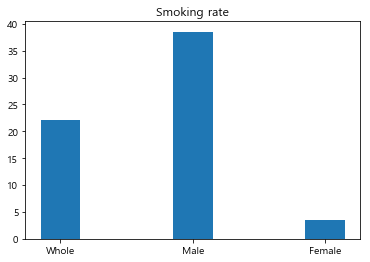

In [19]:
w_smoke = cl.smoking(exam_list)
m_smoke = cl.smoking(male)
f_smoke = cl.smoking(female)

now_smoke = []

now_smoke.append(w_smoke)
now_smoke.append(m_smoke)
now_smoke.append(f_smoke)


ui.smoke_graph('Smoking rate', now_smoke)

# 흡연률 분석결과

- 남성과 여성의 결과값이 가장 극명하게 차이나는 지표이다.<br>
  **※ 여성 흡연을 금기시하는 사회적 분위기 등의 이유로 여자들의 흡연율은 실제보다 낮게 보고되는 것으로 알려져 있다. 유럽의 경우에는 한국과 달리 남녀 간 흡연율 차이가 크지 않다. (출처 : 국가지표체계)**
- 위의 설명을 고려하더라도 국내에서 여성 흡연률이 남성에 비해 크게 낮은 것은 사실이다.
- 여성과 남성의 건강 차이의 원인이라고 예상할 수 있다. 이는 뒷부분의 흡연여부와 건강 수치상의 연관성 조사를 통해 밝히도록 한다.

# Health Rate의 평균 분포

In [20]:
j = 0
name = ["Whole" , "Male" , "Female"]


for i in [exam_list , male, female] :
    j += 1
    print(name[j-1] , " average of BMI Health Rate:" , "%0.2f" % cl.weight_rate(i)[0])

print("\n")

j = 0
for i in [exam_list , male, female] :
    j += 1
    print(name[j-1] , "average of Blood Pressure Health Rate:" , "%0.2f" % cl.bl_press_rate(i)[1])
    
print("\n")
    
j = 0
for i in [exam_list , male, female] :
    j += 1
    print(name[j-1] , "average of Blood Sugar Health Rate:" , "%0.2f" % cl.bl_sugar_rate(i)[0])
    
print("\n")
    
j = 0
for i in [exam_list , male, female] :
    j += 1
    print(name[j-1] , "average of whole cholesterol Health Rate:" , "%0.2f" % cl.cholesterol_level(i)[0])

print("\n")

j = 0
for i in [exam_list , male, female] :
    j += 1
    print(name[j-1] , "average of triglyceride Health Rate:" , "%0.2f" % cl.trigly_level(i)[0])
    
print("\n")
    
j = 0
for i in [exam_list , male, female] :
    j += 1
    print(name[j-1] , "average of HDL cholesterol Health Rate:" , "%0.2f" % cl.hdl_level(i)[0])
    
print("\n")
    
j = 0
for i in [exam_list , male, female] :
    j += 1
    print(name[j-1] , "average of LDL cholesterol Health Rate:" , "%0.2f" % cl.ldl_level(i)[0])

Whole  average of BMI Health Rate: 1.22
Male  average of BMI Health Rate: 1.24
Female  average of BMI Health Rate: 1.20


Whole average of Blood Pressure Health Rate: 1.18
Male average of Blood Pressure Health Rate: 1.20
Female average of Blood Pressure Health Rate: 1.15


Whole average of Blood Sugar Health Rate: 1.18
Male average of Blood Sugar Health Rate: 1.21
Female average of Blood Sugar Health Rate: 1.14


Whole average of whole cholesterol Health Rate: 1.26
Male average of whole cholesterol Health Rate: 1.25
Female average of whole cholesterol Health Rate: 1.26


Whole average of triglyceride Health Rate: 1.17
Male average of triglyceride Health Rate: 1.23
Female average of triglyceride Health Rate: 1.11


Whole average of HDL cholesterol Health Rate: 1.21
Male average of HDL cholesterol Health Rate: 1.27
Female average of HDL cholesterol Health Rate: 1.14


Whole average of LDL cholesterol Health Rate: 1.31
Male average of LDL cholesterol Health Rate: 1.31
Female average of LD

# 지표별 연관성 분석
- 서로 연관있는 지표들을 묶어 상호간의 상관관계를 분석한다.
- 허리둘레, 중성지방은 BMI지수로 나타낼 수 없는 내장지방을 식별할 수 있다. 따라서 3가지 지표를 연계하여 실질적인 비만도를 분석한다.
- 혈당, 혈압, 콜레스테롤 수치는 인과관계가 성립한다고 볼 수는 없지만 합병증을 유발하는 상관관계가 성립한다고 보는 것이 일반적이다. 따라서 고위험군 이상으로 분류된 표본들은 각 지표들의 상관성을 분석한다.
- 혈당, 혈압, 콜레스테롤과 흡연 여부의 상관성을 분석한다.

# 허리둘레, 중성지방, BMI지수

- 세가지 지표를 종합적으로 고려하여 실질적인 국민 비만률의 통계를 나타낸다.
- BMI지수 25이상, 남성의 경우 허리둘레 90이상, 여성의 경우 허리둘레 85이상, 중성지방 150 이상이면 비만으로 판단했다.
- 앞의 결과들과 마찬가지로 남성의 비율이 약 7%정도 높다.
- 전체적인 비만률, 특히 남성의 비만률이 BMI지수와 마찬가지로 상당히 높은 수치를 보인다.
- 개인, 국가적 차원의 비만 관리가 필요해 보인다.

In [21]:
j = 0
for i in [exam_list , male, female] :
    j += 1
    print(name[j-1] , "Over Weighted Rate :" , "%0.2f" % cl.over_weight(i), "%")

Whole Over Weighted Rate : 8.67 %
Male Over Weighted Rate : 11.94 %
Female Over Weighted Rate : 4.93 %


# 혈압과 혈당, 콜레스테롤
- 고혈압과 고혈당이 함께 있는 인구의 비율은 1% 미만으로 나타났으며, 두 지표 사이에 직접적인 인과관계가 없다.
- 고혈압과 고콜레스테롤, 고혈당과 고콜레스테롤의 경우 2~3% 내외의 수치를 보인다.
- 높은 수치는 아니지만, 심각한 합병증을 유발할 수 있는 수치이므로 주의가 필요하다.

In [22]:
j = 0
name = ["Whole : " , "Male : " , "Female : "]


for i in [exam_list , male, female] :
    j += 1
    print(name[j-1] , "Both High Blood Pressure and High Cholesterol:" , "%0.2f" % cl.relation_Bp_Bs_Cl(i)[1] , "%")

print("\n")

j = 0
for i in [exam_list , male, female] :
    j += 1
    print(name[j-1] , "Both High Blood Pressure and High Blood Sugar:" , "%0.2f" % cl.relation_Bp_Bs_Cl(i)[0] , "%")
    
print("\n")
    
j = 0
for i in [exam_list , male, female] :
    j += 1
    print(name[j-1] , "Both High Cholesterol and High Blood Sugar:" , "%0.2f" % cl.relation_Bp_Bs_Cl(i)[2] , "%")

Whole :  Both High Blood Pressure and High Cholesterol: 2.23 %
Male :  Both High Blood Pressure and High Cholesterol: 2.36 %
Female :  Both High Blood Pressure and High Cholesterol: 2.08 %


Whole :  Both High Blood Pressure and High Blood Sugar: 0.41 %
Male :  Both High Blood Pressure and High Blood Sugar: 0.50 %
Female :  Both High Blood Pressure and High Blood Sugar: 0.31 %


Whole :  Both High Cholesterol and High Blood Sugar: 2.81 %
Male :  Both High Cholesterol and High Blood Sugar: 3.36 %
Female :  Both High Cholesterol and High Blood Sugar: 2.19 %


각각의 지표들에 대한 전체 표본의 산점도 그래프는 다음과 같다. 기준치 이상인 표본을 대상으로 나타냈고, 그래프의 가독성을 위해 기준치를 너무 높게 초과한 표본은 제외하였다.<br>

- 사용자의 데이터가 해당 범위에 존재할 경우 사용자의 정보 또한 출력한다.
- 비율에서 얻은 결과와 마찬가지로 그래프가 선형적으로 나타나지 않는다. 즉, 직접적 인과관계가 존재하지 않는다는 점을 다시 한번 확인할 수 있다.

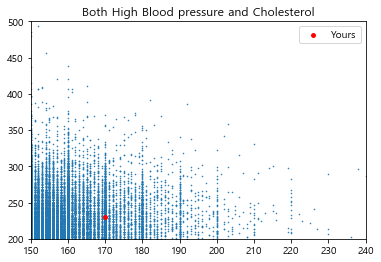

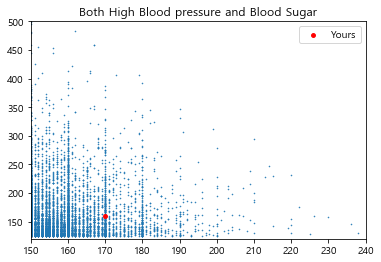

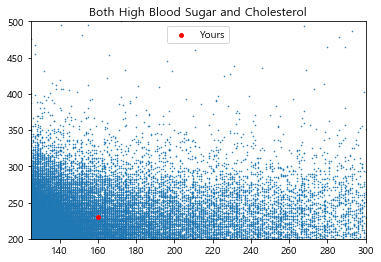

In [23]:
ui.bl_chl_graph(user_data,exam_list)
ui.bl_su_graph(user_data,exam_list)
ui.chl_su_graph(user_data,exam_list)

# 흡연과 혈압, 혈당, 콜레스테롤
- 흡연자와 비흡연자 표본에서 각각 위험군에 속한 인원의 비율을 계산하였다.
- 흡연은 각 수치들과 연관성이 있을 것으로 예상되었으나 흡연자와 비흡연자 간의 유의미한 차이는 나타나지 않았다.
- 즉, 앞서 예상했던 남성과 여성의 건강 수치 차이의 원인을 흡연으로 규정지을 수 없다.

In [24]:
j = 0
for i in [exam_list , male, female] :
    j += 1
    print(name[j-1] , "High Pressure with Smoking :" , "%0.2f" % cl.relation_smoke1(12,i)[0] , "% /  Non Smoking :" , "%0.2f" % cl.relation_smoke1(12,i)[1] , "%")

print("\n")

j = 0
for i in [exam_list , male, female] :
    j += 1
    print(name[j-1] , "High Blood Sugar with Smoking :" , "%0.2f" % cl.relation_smoke1(14,i)[0] , "% /  Non Smoking :" , "%0.2f" % cl.relation_smoke1(14,i)[1] , "%")

print("\n")

j = 0
for i in [exam_list , male, female] :
    j += 1
    print(name[j-1] , "High Cholesterol with Smoking :" , "%0.2f" % cl.relation_smoke1(15,i)[0] , "% /  Non Smoking :" , "%0.2f" % cl.relation_smoke1(15,i)[1] , "%")

Whole :  High Pressure with Smoking : 4.29 % /  Non Smoking : 4.63 %
Male :  High Pressure with Smoking : 4.92 % /  Non Smoking : 4.79 %
Female :  High Pressure with Smoking : 4.06 % /  Non Smoking : 2.46 %


Whole :  High Blood Sugar with Smoking : 6.62 % /  Non Smoking : 9.92 %
Male :  High Blood Sugar with Smoking : 8.55 % /  Non Smoking : 10.21 %
Female :  High Blood Sugar with Smoking : 5.90 % /  Non Smoking : 5.93 %


Whole :  High Cholesterol with Smoking : 12.24 % /  Non Smoking : 12.58 %
Male :  High Cholesterol with Smoking : 10.13 % /  Non Smoking : 12.58 %
Female :  High Cholesterol with Smoking : 13.04 % /  Non Smoking : 12.61 %


# 사망원인과의 연관성 분석
- 앞서 분석한 지표들이 유발하는 합병증과 직접적인 질병들의 사망률 통계를 통해 수치상으로 나타난 지표가 실제로 사망률에 어떠한 영향을 미치는지 알아본다.
- 먼저, 2016년도 주요 사망원인의 사망률과 그 비율은 다음과 같다. 이 중 본 프로젝트에서 다룬 지표와 관련된 질병은 **당뇨병, 고혈압성 질환, 심장질환, 뇌혈관질환**이다.
- 추가적으로 자살로 인한 사망의 비율이 주목할만큼 높다. 하지만 본 프로젝트에서 다룰 문제는 아니므로 더 이상의 논의는 하지않도록 한다. 

In [25]:
file = open('stats_101201.csv', 'r', encoding='UTF8')
read = csv.reader(file)
reason = []
for line in read:
    reason.append(line)
file.close()
prior_reason = []

print("2016년도 기준", reason[0][0])
for i in range(2, len(reason)):
    portion = (float(reason[i][9]) / float(reason[2][9]))*100
    if i == 9 or i == 11 or i == 12 or i ==  13:
        prior_reason.append(float("%0.2f"%portion))
    print(reason[i][0],  " : " , reason[i][9] , " / " ,"%0.2f" % portion , "%")

2016년도 기준 ﻿주요 사망원인별 사망률 추이 [단위 : 인구10만 명당 명]
전체  :  549.4  /  100.00 %
신생물  :  156  /  28.39 %
- 각종 암  :  153  /  27.85 %
* 위암  :  16.2  /  2.95 %
* 간암  :  21.5  /  3.91 %
* 폐암  :  35.1  /  6.39 %
내분비 및 대사성질환  :  21.6  /  3.93 %
- 당뇨병  :  19.2  /  3.49 %
순환기계통의 질환  :  118.1  /  21.50 %
- 고혈압성 질환  :  10.6  /  1.93 %
- 심장 질환  :  58.2  /  10.59 %
- 뇌혈관 질환  :  45.8  /  8.34 %
호흡기계통의 질환  :  57.5  /  10.47 %
- 폐렴  :  32.2  /  5.86 %
- 만성하기도 질환  :  13.7  /  2.49 %
소화기계통의 질환  :  23.4  /  4.26 %
- 간 질환  :  13.3  /  2.42 %
사망의 외부요인  :  55.2  /  10.05 %
- 운수사고  :  10.1  /  1.84 %
- 자살  :  25.6  /  4.66 %


- 주요 지표와 연관된 질병의 사망률은 다음과같다
- 당뇨병과 고혈압성 질환의 사망률보다 합병증인 심혈관 질환의 사망률이 월등히 높다.

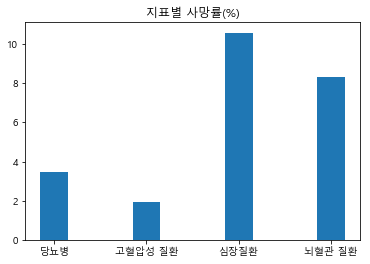

In [26]:
ui.prior_death_Rate("지표별 사망률(%)", prior_reason)

- 다음과 같이 고혈압과 고혈당, 고콜레스테롤의 비율은 7~12%로 나타나고 이와 직접적으로 연관된 사망률은 4% 미만이다.
- 앞서 혈압과 혈당 콜레스테롤의 연관성 파트에서 나타난 수치는 0~3%대의 수준으로 낮았지만 그것이 일으키는 합병증의 사망률은 8~10%이다.
- 즉, 비율은 높지 않고 인과관계는 적지만 혈압, 혈당, 콜레스테롤의 수치가 모두 높게 나타난다면 상당한 주의를 요한다.

In [27]:
high_pl = (cl.bl_press_rate(exam_list)[0])
high_su = (cl.bl_sugar_rate(exam_list)[2])
high_chl = (cl.cholesterol_level(exam_list)[1])
su = 0
for i in range(len(high_su)):
    if high_su[i] >= 1.6:
        su += 1
print("High Blood Sugar : " , "%0.2f" %(su/len(high_su)* 100) , "%")

pl = 0
for i in range(len(high_pl)):
    if high_pl[i] >= 1.6:
        pl += 1
print("High Blood Pressure : " , "%0.2f" %(pl/len(high_pl)* 100) , "%")

chl = 0
for i in range(len(high_chl)):
    if high_chl[i] >= 1.6:
        chl += 1
print("High Cholesterol : " , "%0.2f" %(chl/len(high_chl)* 100) , "%")

High Blood Sugar :  7.92 %
High Blood Pressure :  7.24 %
High Cholesterol :  12.38 %


# 결론
- 전체적으로 남성의 건강이 여성보다 좋지 않다.
- 이에 대한 직접적인 인과관계는 본 프로젝트에서 나타난 결과로 미루어 볼 때 비만도, 즉 식습관의 영향으로 추측된다. <br>
    **다른 원인도 존재하겠지만 본 프로젝트에서는 밝힐 수 없었다.**
- 흡연은 합병증에 대한 간접적인 원인은 될 수 있으나 건강지표 그 자체에 영향을 준다고 볼 수는 없다.
- 비만에 대한 두 가지의 지수를 통해 알 수 있듯 비만에 대한 경각심이 필요하다.
- 주요 암을 포함하여 당뇨병, 고혈압성 질환 등의 요인보다 앞서 분석했던 지표들이 복합적으로 야기하는 합병증의 사망률이 더 높다.
- 즉, 전체적 비율은 높지 않지만 각 지표들이 모두 높은 경우 발생할 수 있는 합병증은 치명적이다.

# 한계점 및 발전가능성, 느낀점(교수님 읽어주세요..)

* 기능상 한계점
    - 표본이 가지고 있는 질병에 대한 정보가 없고, 사망자의 정확한 데이터 없이 사망률만으로 분석하여 정확성이 다소 부족할 수 있다.
    - 국민 전체의 평균이 아닌 40대 이상의 평균치이므로 전체적인 국가의 건강상태수준 평가를 할 수 없었다.
    - Health Rate의 결과값을 실용성있게 활용하지 못했다.
    - 사용자의 데이터를 단순한 수치계산 이외에는 실질적으로 분석하지 못했다.
* 발전 가능성
    - 좀 더 정확하고 다차원적인 데이터를 이용하면 비슷한 알고리즘으로 더욱 실용적인 결과를 도출 할 수 있다.
    - Health Rate를 응용하여 여러 분석을 실시하면 직관적으로 건강수준의 평가가 가능하다.
    - 대표적 지표 몇가지에만 적용했지만 동일한 로직으로 다른 지표들에도 동일하게 적용가능하다.
    - 사용자의 정보를 입력받은 후 기존 데이터에 덮어쓰는 코드를 구현하지는 않았지만, 어렵지 않게 구현 가능하고 이를 이용하면 분석횟수가 늘어날수록 새로운 데이터의 갱신이 즉각적으로 가능하다.
    
    
사실 더 많은 것들을 해보고 싶었지만, 시간의 여유와 제 능력의 부족으로 여기까지 밖에 하지 못한게 아쉽습니다.<br>
조잡하거나 효율적이지 못하게 짜여진 코드들도 많고 처음에 계획했으나 구현하지 못한 기능들도 정말 많습니다.<br>
그래도 제가 계속 생각해왔고 앞으로의 목표로 잡고있는 분야를 미약하게나마 실제로 구현해봤다는 점은 정말 뿌듯합니다.<br>
교수님이 엑셀로 할 수 있는걸 굳이 파이썬으로 하고있지 말라고 하신게 큰 도움이 된 것 같습니다. 그 부분에 대해서 많이 고민해봤습니다.<br>
나름대로 고심한 끝에 완벽하지는 않지만, 개인적으로 어느정도 만족할만한 결과물을 얻었습니다. 추후에도 큰 도움이 될 것이라고 생각합니다.<br>
하지만..객관적인 평가는 어떨지 모르겠습니다..점수 나오면 그게 교수님의 답변이라고 생각하겠습니다!<br>
혹시 만약 제가 Worst에 뽑힌다면 이 Cell은 제발 지워주세요..한 학기동안 고생 많으셨습니다!